In [1]:
# Import what we need
import numpy as np
from matplotlib import pyplot as plt
import ebisim

In [2]:
ELEMENT = "K"
species = ebisim.EBISSpecies(ELEMENT)

In [3]:
print(species)
pb = ebisim.PoissonSolver(ELEMENT, 0.2, 4000)

EBISSpecies - Element: Potassium (K, Z = 19)
r_e / r_d = 0.051


In [4]:
        NkT = np.zeros(2 * (species.element.z + 1))
        NkT[2] = 1e16
        NkT[3] = 2e16
        NkT[4] = 3e16
        NkT[5] = 2e16
        NkT[6] = 1e16
        NkT[species.element.z + 3] = 5
        NkT[species.element.z + 4] = 50
        NkT[species.element.z + 5] = 500
        NkT[species.element.z + 6] = 50
        NkT[species.element.z + 7] = 5

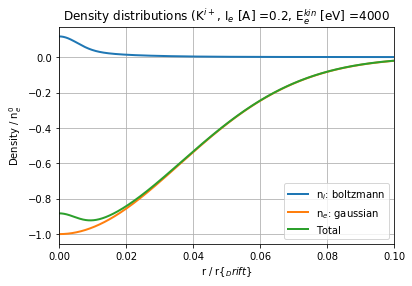

In [5]:
# Ion models: boltzmann, maxwell3, maxwell5, gaussian, null
# Electron models: gaussian, normal (size: Herrmann radius)
model = ['boltzmann', 'gaussian']
_ = pb.solve(NkT, model)
_ = pb.plot_densities()
plt.show()

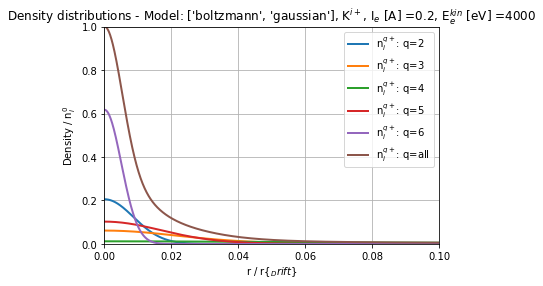

In [6]:
_ = pb.plot_densities_all()
plt.show()

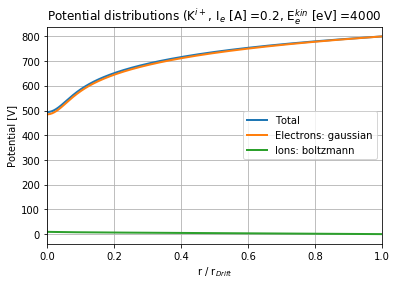

In [7]:
_ = pb.plot_potential()
plt.show()

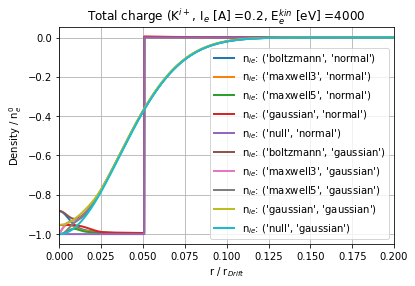

In [8]:
_ = pb.plot_densities_combine(NkT)
plt.show()

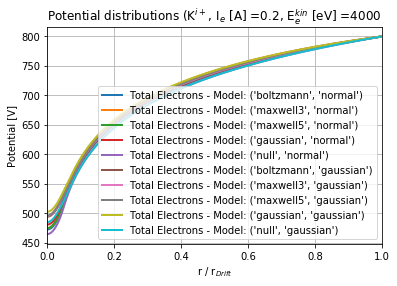

In [9]:
_ = pb.plot_potential_combine(NkT)
plt.show()